In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
file_pattern = '/data/sallen/results/MEOPAR/wastewater/alkalinity/*may21/SalishSea_1d_202105[0-3][0-9]_202105[0-3][0-9]_chem_T.nc'
file_list = glob.glob(file_pattern)

new = xr.open_mfdataset(file_list, data_vars=['CO2_flux'])  
new = new.drop(['time_counter'])
time_values = ['05-01', '05-02', '05-03', '05-04', '05-05', '05-06', '05-07', '05-08', '05-09', '05-10','05-11', '05-12', '05-13', '05-14', '05-15', '05-16','05-17','05-18', '05-19', '05-20', '05-21', '05-22','05-23', '05-24', '05-25', '05-26', '05-27', '05-28', '05-29', '05-30', '05-31']
new = new.assign_coords(time_counter = time_values)
new

<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 31)
Coordinates:
    nav_lat                     (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                     (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                (time_counter) <U5 '05-01' '05-02' ... '05-31'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    bounds_nav_lat              (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    area                        (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    deptht_bounds               (deptht, axis_nbounds) float32 dask.array<chunksize=(40, 2), meta=np.ndarray>
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    PAR                         (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    turbidity                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    CO2_flux                    (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20210501_20210531_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 21:33:20 GMT
    uuid:         935cd8f4-116f-437e-aac2-ef6ce5cc36fb

In [3]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})

area = meshmask.e1t[0] * meshmask.e2t[0]
area
volumn = meshmask.e1t[0] * meshmask.e2t[0] * meshmask.e3t_0[0]
volumn = volumn.rename({'z' : 'deptht'})

volumn

<xarray.DataArray (y: 898, x: 398, deptht: 40)>
array([[[ 185243.37452372,  185244.08957647,  185245.48230844, ...,
         4988602.12148864, 4988890.54061969, 4989038.63339594],
        [ 190803.49776947,  190804.23428469,  190805.66881984, ...,
         5138336.18183385, 5138633.25793263, 5138785.79574822],
        [ 194672.17811027,  194672.92955888,  194674.39318027, ...,
         5242519.70259455, 5242822.80212832, 5242978.43275958],
        ...,
        [ 231245.03207738,  231245.92469983,  231247.66329022, ...,
         6227426.27406199, 6227786.3165811 , 6227971.18537267],
        [ 231250.84481954,  231251.73746443,  231253.47609851, ...,
         6227582.81114701, 6227942.8627164 , 6228127.73615497],
        [ 231256.65316662,  231257.54583394,  231259.28451169, ...,
         6227739.22987272, 6228099.29048557, 6228284.16856761]],

       [[ 185143.43441715,  185144.14908412,  185145.5410647 , ...,
         4985910.73547314, 4986198.99900004, 4986347.01187919],
        [ 190700.34398872,  190701.08010577,  190702.51386536, ...,
         5135558.25160667, 5135855.16709769, 5136007.62244701],
        [ 194576.87296009,  194577.62404081,  194579.08694566, ...,
         5239953.13590566, 5240256.08705178, 5240411.64149136],
...
        [ 177713.73998053,  177714.42596835,  177715.76208959, ...,
         4785829.142683  , 4786105.8383683 , 4786247.91157982],
        [ 177057.6964592 ,  177058.37991464,  177059.71110349, ...,
         4768161.89757515, 4768437.5718177 , 4768579.12055537],
        [ 176408.84861791,  176409.52956875,  176410.85587931, ...,
         4750688.43205494, 4750963.09605822, 4751104.12607462]],

       [[ 238327.01473203,  238327.93469145,  238329.72652694, ...,
         6418143.99223245, 6418515.06121492, 6418705.59169602],
        [ 238155.19081508,  238156.11011125,  238157.9006549 , ...,
         6413516.77596178, 6413887.57741887, 6414077.97053537],
        [ 237066.46303945,  237067.37813305,  237069.16049122, ...,
         6384197.3484508 , 6384566.45478697, 6384755.97752028],
        ...,
        [ 177165.58040949,  177166.26428137,  177167.59628134, ...,
         4771067.2112183 , 4771343.05343336, 4771484.68841883],
        [ 176356.6297533 ,  176357.31050258,  176358.63642053, ...,
         4749282.17858214, 4749556.761282  , 4749697.74955204],
        [ 175504.07273636,  175504.7501947 ,  175506.0697028 , ...,
         4726322.82711085, 4726596.08240155, 4726736.38909506]]])
Dimensions without coordinates: y, x, deptht

In [4]:
file_pattern = '/data/sallen/results/MEOPAR/wastewater/long_run/*may18/SalishSea_1d_201805[0-3][0-9]_201805[0-3][0-9]_chem_T.nc'
file_list = glob.glob(file_pattern)

base = xr.open_mfdataset(file_list, data_vars=['CO2_flux'])  
base = base.drop(['time_counter'])
time_values = ['05-01', '05-02', '05-03', '05-04', '05-05', '05-06', '05-07', '05-08', '05-09', '05-10','05-11', '05-12', '05-13', '05-14', '05-15', '05-16','05-17','05-18', '05-19', '05-20', '05-21', '05-22','05-23', '05-24', '05-25', '05-26', '05-27', '05-28', '05-29', '05-30', '05-31']
base = base.assign_coords(time_counter= time_values)

In [5]:
x_slice = 300
y_slice = 450
diff = new['CO2_flux'].isel(y = y_slice, x = x_slice) - base['CO2_flux'].isel(y = y_slice, x = x_slice)


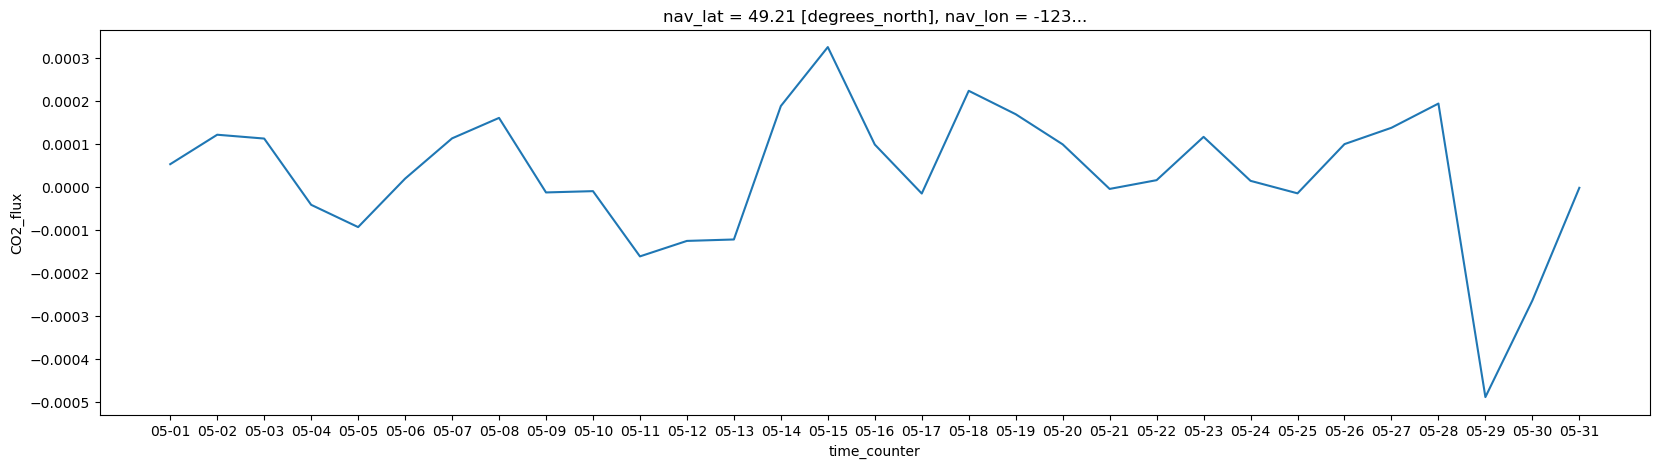

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
diff.plot(ax=axs)

In [7]:
diff_sum = (diff * area).where(tmask).sum(axis = 1).sum(axis = 1) / area.where(tmask)
diff_sum

<xarray.DataArray (time_counter: 31)>
dask.array<sum-aggregate, shape=(31,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    nav_lat       float32 49.21
    nav_lon       float32 -123.3
  * time_counter  (time_counter) <U5 '05-01' '05-02' '05-03' ... '05-30' '05-31'

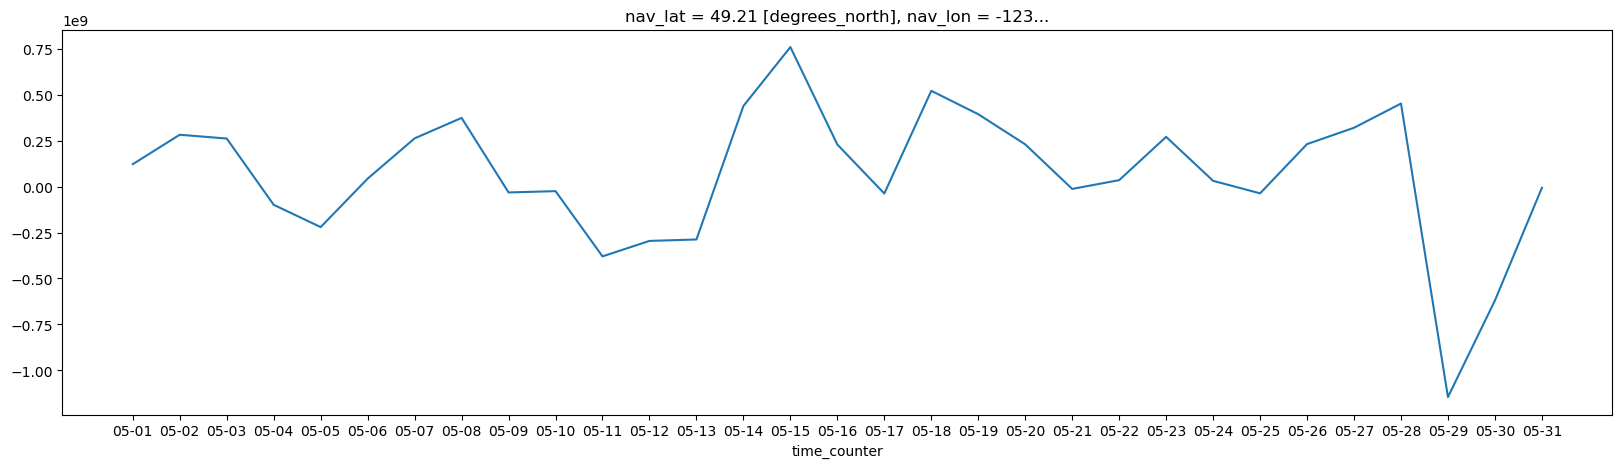

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
diff_sum.plot(ax=axs)